<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Sentiment Analysis of Reddit Data using Reddit API</h1>

In this live coding session, we leverage the Python Reddit API Wrapper (`PRAW`) to retrieve data from subreddits on [Reddit](https://www.reddit.com), and perform sentiment analysis using [`pipelines`](https://huggingface.co/docs/transformers/main_classes/pipelines) from [HuggingFace ( 🤗 the GitHub of Machine Learning )](https://techcrunch.com/2022/05/09/hugging-face-reaches-2-billion-valuation-to-build-the-github-of-machine-learning/), powered by [transformer](https://arxiv.org/pdf/1706.03762.pdf).

## Objectives

At the end of the session, you will 

- know how to work with APIs
- feel more comfortable navigating thru documentation, even inspecting the source code
- understand what a `pipeline` object is in HuggingFace
- perform sentiment analysis using `pipeline`
- run a python script in command line and get the results

## How to Submit

- At the end of each task, commit* the work into the repository you created before the assignment
- After completing all three tasks, make sure to push the notebook containing all code blocks and output cells to your repository you created before the assignment
- Submit the link to the notebook in Canvas

\***NEVER** commit a notebook displaying errors unless it is instructed otherwise. However, commit often; recall git ABC = **A**lways **B**e **C**ommitting.

## Tasks

### Task I: Instantiate a Reddit API Object

The first task is to instantiate a Reddit API object using [PRAW](https://praw.readthedocs.io/en/stable/), through which you will retrieve data. PRAW is a wrapper for [Reddit API](https://www.reddit.com/dev/api) that makes interacting with the Reddit API easier unless you are already an expert of [`requests`](https://docs.python-requests.org/en/latest/).

#### 1. Install packages

Please ensure you've ran all the cells in the `imports.ipynb`, located [here](https://github.com/FourthBrain/MLE-8/blob/main/assignments/week-3-analyze-sentiment-subreddit/imports.ipynb), to make sure you have all the required packages for today's assignment.

####  2. Create a new app on Reddit 

Create a new app on Reddit and save secret tokens; refer to [post in medium](https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c) for more details.

- Create a Reddit account if you don't have one, log into your account.
- To access the API, we need create an app. Slight updates, on the website, you need to navigate to `preference` > `app`, or click [this link](https://www.reddit.com/prefs/apps) and scroll all the way down. 
- Click to create a new app, fill in the **name**, choose `script`, fill in  **description** and **redirect uri** ( The redirect URI is where the user is sent after they've granted OAuth access to your application (more info [here](https://github.com/reddit-archive/reddit/wiki/OAuth2)) For our purpose, you can enter some random url, e.g., www.google.com; as shown below.


    <img src="https://miro.medium.com/max/700/1*lRBvxpIe8J2nZYJ6ucMgHA.png" width="500"/>
- Jot down `client_id` (left upper corner) and `client_secret` 

    NOTE: CLIENT_ID refers to 'personal use script" and CLIENT_SECRET to secret.
    
    <div>
    <img src="https://miro.medium.com/max/700/1*7cGAKth1PMrEf2sHcQWPoA.png" width="300"/>
    </div>

- Create `secrets_reddit.py` in the same directory with this notebook, fill in `client_id` and `secret_id` obtained from the last step. We will need to import those constants in the next step.
    ```
    REDDIT_API_CLIENT_ID = "client_id"
    REDDIT_API_CLIENT_SECRET = "secret_id"
    REDDIT_API_USER_AGENT = "any string except bot; ex. My User Agent"
    ```
- Add `secrets_reddit.py` to your `.gitignore` file if not already done. NEVER push credentials to a repo, private or public. 

#### 3. Instantiate a `Reddit` object

Now you are ready to create a read-only `Reddit` instance. Refer to [documentation](https://praw.readthedocs.io/en/stable/code_overview/reddit_instance.html) when necessary.

In [2]:
import praw
import secrets_reddit

# Create a Reddit object which allows us to interact with the Reddit API
reddit = praw.Reddit(
    client_id=secrets_reddit.REDDIT_API_CLIENT_ID,
    client_secret=secrets_reddit.REDDIT_API_CLIENT_SECRET,
    user_agent=secrets_reddit.REDDIT_API_USER_AGENT,
)

In [3]:
print(reddit) 

<details>
<summary>Expected output:</summary>   

```<praw.reddit.Reddit object at 0x10f8a0ac0>```
</details>

#### 4. Instantiate a `subreddit` object

Lastly, create a `subreddit` object for your favorite subreddit and inspect the object. The expected outputs you will see are from `r/machinelearning` unless otherwise specified.

In [4]:
subreddit = reddit.subreddit("machinelearning")

What is the display name of the subreddit?

In [5]:
print(subreddit.display_name) # This is 'machinelearning' subreddit

machinelearning


<details>
<summary>Expected output:</summary>   

    machinelearning
</details>

How about its title, is it different from the display name?

In [6]:
print(subreddit.title)

Machine Learning


<details>
<summary>Expected output:</summary>   

    Machine Learning
</details>

Print out the description of the subreddit:

In [9]:
print(subreddit.description[:500])  # too long to print everything out
                                    # only the first 500 characters are shown

**[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
--------
+[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
--------
+[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
--------
+[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
--------
+[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict


<details>
<summary>Expected output:</summary>

    **[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
    --------
    +[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
    --------
    +[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
    --------
    +[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
    --------
    +[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict
</details>

### Task II: Parse comments

#### 1. Top Posts of All Time

Find titles of top 10 posts of **all time** from your favorite subreddit. Refer to [Obtain Submission Instances from a Subreddit Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html)) if necessary. Verify if the titles match what you read on Reddit.

In [13]:
# try run this line, what do you see? press q once you are done
?subreddit.top

In [15]:
for item in subreddit.top(limit=10):
    print(item.title)

[Project] From books to presentations in 10s with AR + ML
[D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
[R] First Order Motion Model applied to animate paintings
[N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
[D] This AI reveals how much time politicians stare at their phone at work
[D] Types of Machine Learning Papers
[D] The machine learning community has a toxicity problem
[Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
I made a robot that punishes me if it detects that if I am procrastinating on my assignments [P]
[P] Using oil portraits and First Order Model to bring the paintings back to life


<details> <summary>Expected output:</summary>

    [Project] From books to presentations in 10s with AR + ML
    [D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
    [R] First Order Motion Model applied to animate paintings
    [N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
    [D] This AI reveals how much time politicians stare at their phone at work
    [D] Types of Machine Learning Papers
    [D] The machine learning community has a toxicity problem
    [Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
    [P] Using oil portraits and First Order Model to bring the paintings back to life
    [D] Convolution Neural Network Visualization - Made with Unity 3D and lots of Code / source - stefsietz (IG)    
</details>

#### 2. Top 10 Posts of This Week

What are the titles of the top 10 posts of **this week** from your favorite subreddit?

In [18]:
subreddit = reddit.subreddit("machinelearning") # keep on using 'machinelearning' as subreddit of choice

for submission in subreddit.top(time_filter="week", limit=10): # limited date timeframe to 'week', top 10
    print(submission.title)

30% of Google's Reddit Emotions Dataset is Mislabeled [D]
[R] mixed reality future — see the world through artistic lenses — made with NeRF
[N] First-Ever Course on Transformers: NOW PUBLIC
[D] Why are Corgi dogs so popular in machine learning (especially in the image generation community)?
[D] Are there any rejected papers that ended up having significant impact in the long run?
[D] Noam Chomsky on LLMs and discussion of LeCun paper (MLST)
[N] Andrej Karpathy is leaving Tesla
[R] So someone actually peer-reviewed this and thought "yeah, looks good"?
[D] How do you verify the novelty of your research?
[N] BigScience Releases their 176 Billion Parameter Open-access Multilingual Language Model


<details><summary>Expected output:</summary>

    [N] Ian Goodfellow, Apple’s director of machine learning, is leaving the company due to its return to work policy. In a note to staff, he said “I believe strongly that more flexibility would have been the best policy for my team.” He was likely the company’s most cited ML expert.
    [R][P] Thin-Plate Spline Motion Model for Image Animation + Gradio Web Demo
    [P] I’ve been trying to understand the limits of some of the available machine learning models out there. Built an app that lets you try a mix of CLIP from Open AI + Apple’s version of MobileNet, and more directly on your phone's camera roll.
    [R] Meta is releasing a 175B parameter language model
    [N] Hugging Face raised $100M at $2B to double down on community, open-source & ethics
    [P] T-SNE to view and order your Spotify tracks
    [D] : HELP Finding a Book - A book written for Google Engineers about foundational Math to support ML
    [R] Scaled up CLIP-like model (~2B) shows 86% Zero-shot on Imagenet
    [D] Do you use NLTK or Spacy for text preprocessing?
    [D] Democratizing Diffusion Models - LDMs: High-Resolution Image Synthesis with Latent Diffusion Models, a 5-minute paper summary by Casual GAN Papers
</details>

💽❓ Data Question:

Check out what other attributes the `praw.models.Submission` class has in the [docs](https://praw.readthedocs.io/en/stable/code_overview/models/submission.html). 

1. After having a chance to look through the docs, is there any other information that you might want to extract? How might this additional data help you?

Write a sample piece of code below extracting three additional pieces of information from the submission below.

In [38]:
submission_example = subreddit.top(time_filter="week", limit = 1)
print('Title: ', submission.title) # the submission post that we are going to extract 3 additional pieces of info
print('Author: ', submission.author) # print author's name
print('Permalink: ', submission.permalink) # print permalink of post
print('Original content boolean: ', submission.is_original_content) # is it original content?

Title:  [P] Using oil portraits and First Order Model to bring the paintings back to life
Author:  Enguzelharf
Permalink:  /r/MachineLearning/comments/j0oyk6/p_using_oil_portraits_and_first_order_model_to/
Original content boolean:  False


💽❓ Data Question:

2. Is there any information available that might be a concern when it comes to Ethical Data?

> I do believe that the attributes such as 'author' and 'over_18' might pose to be a concern when it comes to ethical data. It is exposing who created the post and other sensitive material (distinguished by the over 18 designation) which might put certain individual's privacy at jeopardy.

#### 3. Comment Code

Add comments to the code block below to describe what each line of the code does (Refer to [Obtain Comment Instances Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html) when necessary). The code is adapted from [this tutorial](https://praw.readthedocs.io/en/stable/tutorials/comments.html)

The purpose is 
1. to understand what the code is doing 
2. start to comment your code whenever it is not self-explantory if you have not (others will thank you, YOU will thank you later 😊) 

In [26]:
%%time
from praw.models import MoreComments

# instantiate empty list to house the top comments that are not part of the 'more comments'
top_comments = []

# looping through the top 10 comments in the top post of all time in subreddit -> 'machine learning'
for submission in subreddit.top(limit=10):
    # loop through the top 10 comments in the top post of all time
    for top_level_comment in submission.comments:
        # skip if the comment is part of 'more comments'
        if isinstance(top_level_comment, MoreComments):
            continue
        # append otherwise
        top_comments.append(top_level_comment.body)

CPU times: user 422 ms, sys: 26.2 ms, total: 449 ms
Wall time: 1min 52s


#### 4. Inspect Comments

How many comments did you extract from the last step? Examine a few comments. 

In [36]:
#YOUR CODE HERE  # the answer may vary 693 for r/machinelearning
print('Number of comments: ', len(top_comments), '\n')

print('Top 5 comments: \n')

counter = 1
for comment in top_comments[: 5]:
    print('Top comment #', counter, '\n')
    print(comment)
    counter = counter+1
    print('---')

Number of comments:  738 

Top 5 comments: 

Top comment # 1 

Twitter thread: [https://twitter.com/cyrildiagne/status/1259441154606669824](https://twitter.com/cyrildiagne/status/1259441154606669824)

Code: [https://github.com/cyrildiagne/ar-cutpaste/tree/clipboard](https://github.com/cyrildiagne/ar-cutpaste/tree/clipboard)

Background removal is done with U^(2-Net) (Qin et Al, Pattern Recognition 2020): [https://github.com/NathanUA/U-2-Net](https://github.com/NathanUA/U-2-Net)

**/!\\ EDIT:** You can now subscribe to a beta program to get early access to the app: [https://arcopypaste.app](https://arcopypaste.app)  !
---
Top comment # 2 

Simple yet very useful. Thank you for sharing the code.
---
Top comment # 3 

The future 🤯
---
Top comment # 4 

Ohh the nightmare of making this into a stable product... Enough to drive you mad just thinking about it
---
Top comment # 5 

Almost guaranteed, Apple will copy your idea in 3, 2, 1....
---


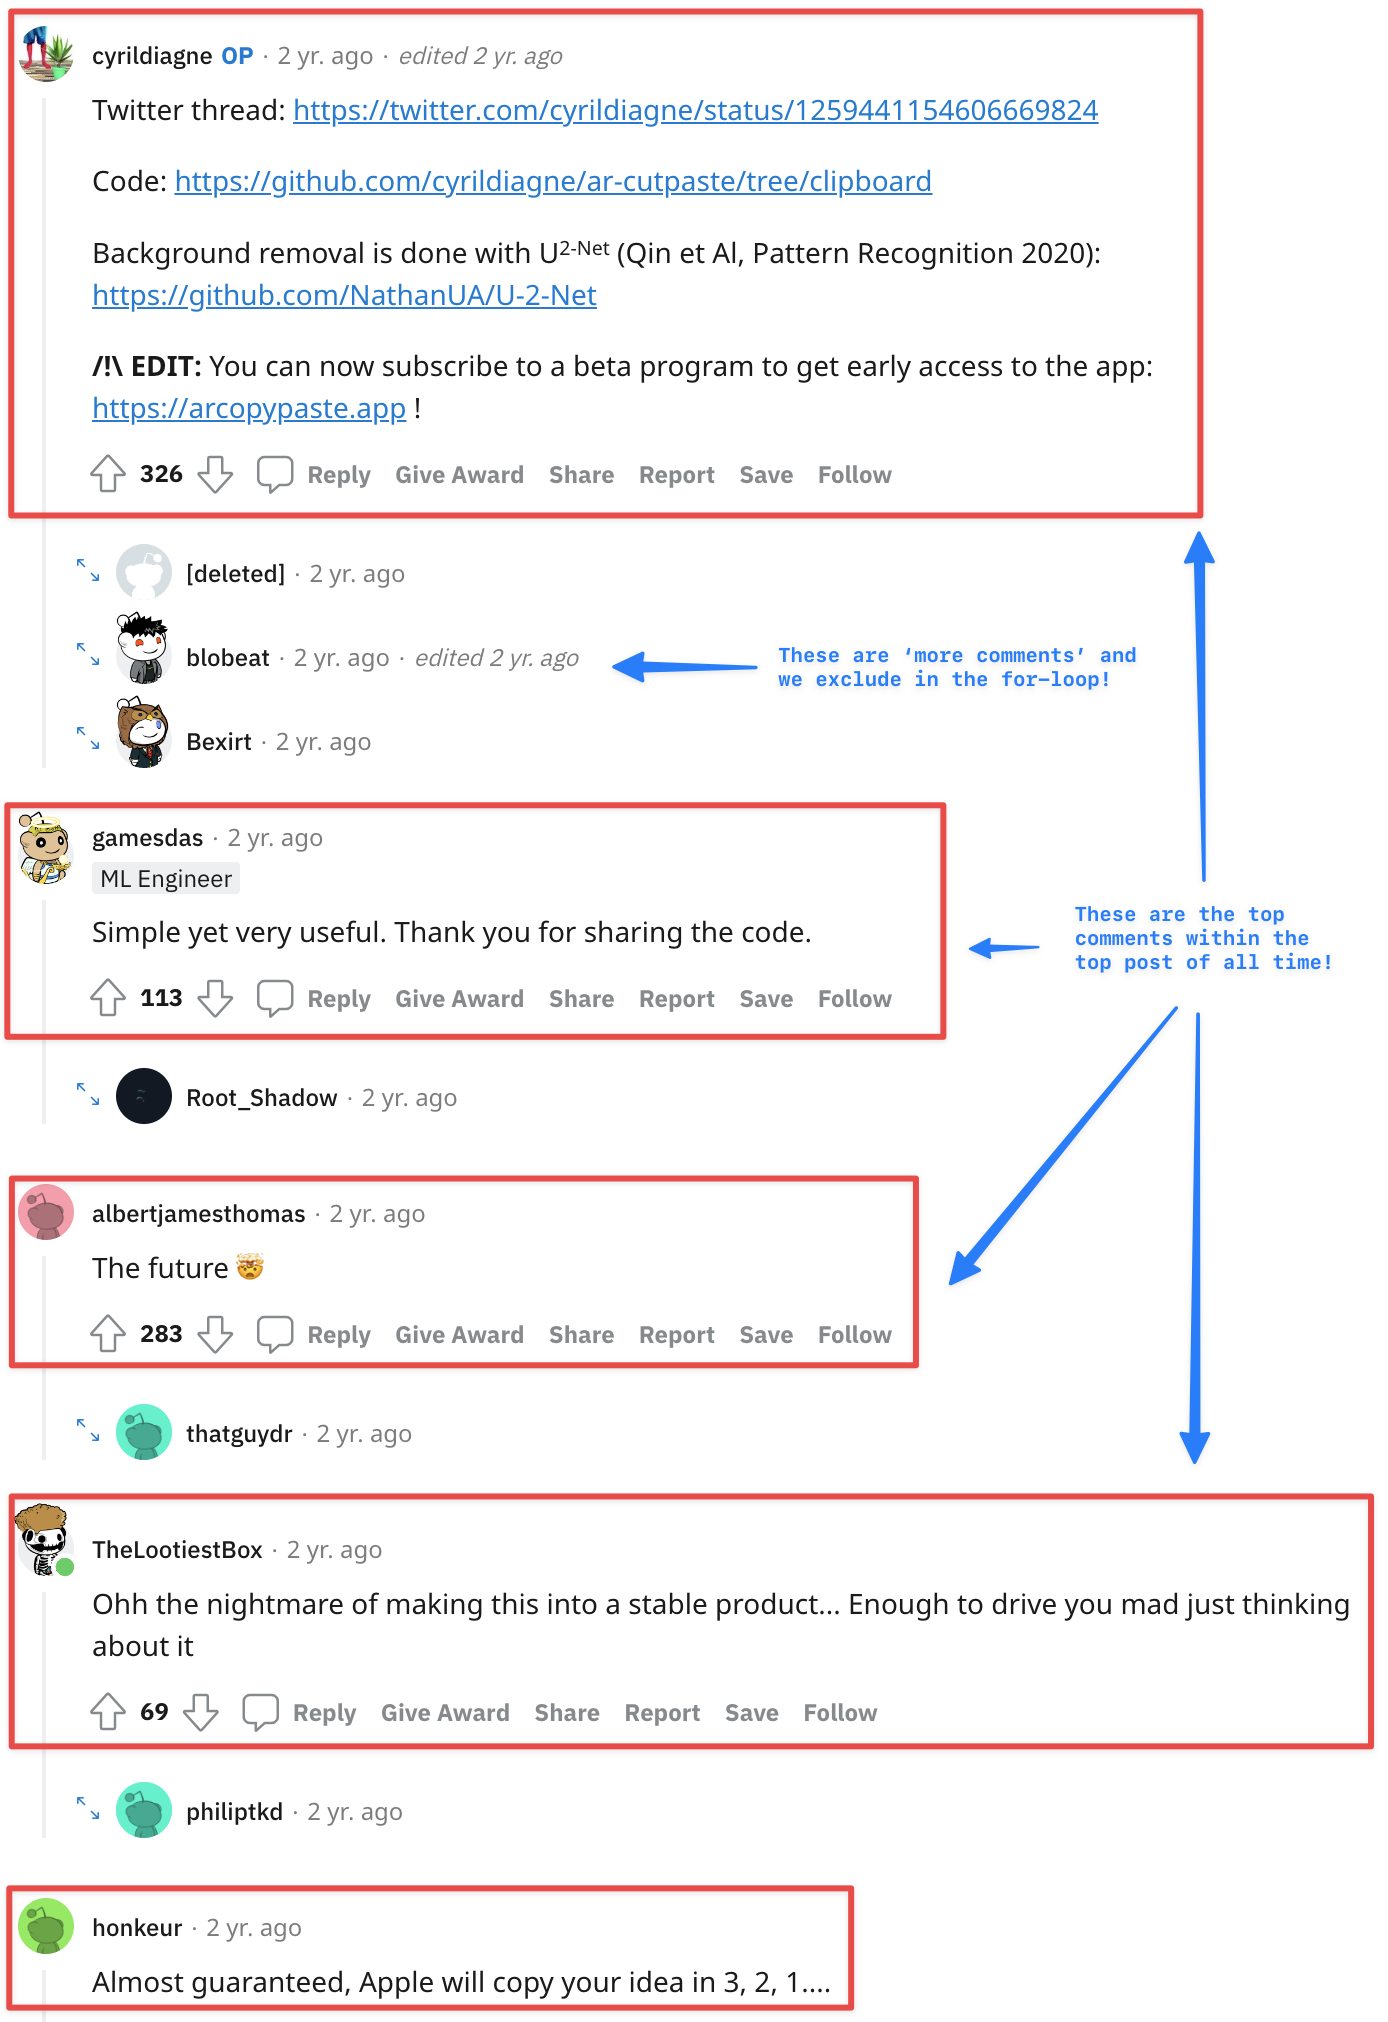

In [37]:
import random

[random.choice(top_comments) for i in range(3)]

['This gets 100 very nices',
 'In other words, humans bad.',
 "Thing is there is lots of half knowledge revolved around machine learning. I include myself to it but always try to respectfully make claims or ask questions. Everyone is a data scientist these days simply because it is so overhyped. And there's lots of narcisissm and envy from both experts and beginners. I'd say this contributes a lot to this toxicity."]

> ^ The above code is grabbing 3 random comments from the array of the top comments.

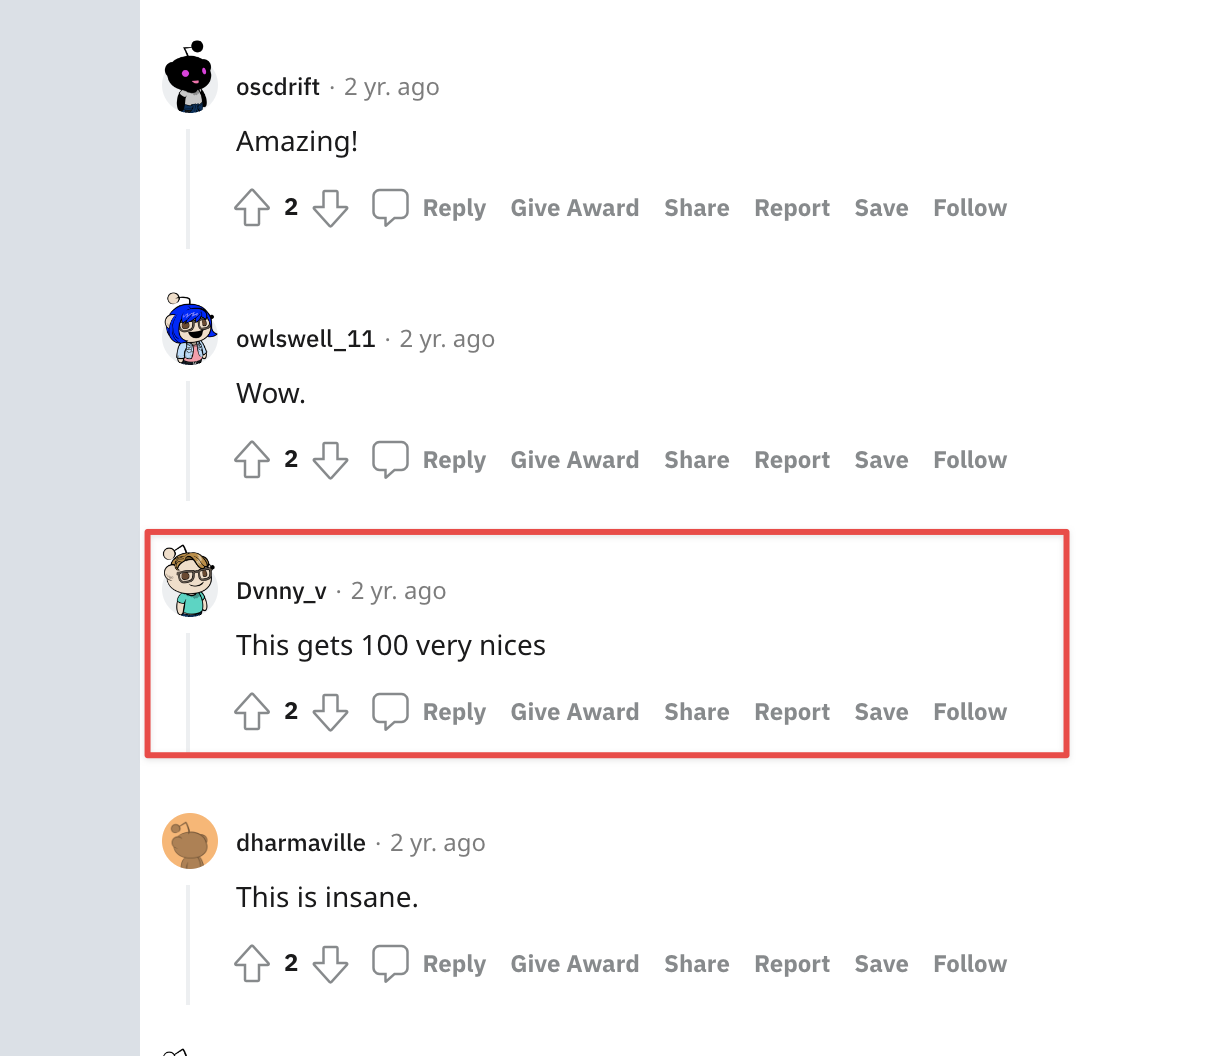

<details> <summary>Some of the comments from `r/machinelearning` subreddit are:</summary>

    ['Awesome visualisation',
    'Similar to a stack or connected neurons.',
    'Will this Turing pass the Turing Test?']
</details>

💽❓ Data Question:

3. After having a chance to review a few samples of 5 comments from the subreddit, what can you say about the data? 

HINT: Think about the "cleanliness" of the data, the content of the data, think about what you're trying to do - how does this data line up with your goal?

> I think the data itself is relatively clean. However, when the data contains links, media, markdown, etc. the data becomes messier and harder to peruse. The data that we are seeing from the API for this comments exercise is the raw input that the user enters into the text box field when making a submission, including markdown notes.

#### 5. Extract Top Level Comment from Subreddit `TSLA`.

Write your code to extract top level comments from the top 10 topics of a time period, e.g., year, from subreddit `TSLA` and store them in a list `top_comments_tsla`.  

In [39]:
subreddit_tsla = reddit.subreddit("TSLA")

top_comments_tsla = []

for submission in subreddit_tsla.top(limit=5):
    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        top_comments_tsla.append(top_level_comment.body)

In [40]:
len(top_comments_tsla) # Expected: 174 for r/machinelearning

103

In [41]:
[random.choice(top_comments_tsla) for i in range(3)]

['10 from 500 days. Bought one more during 800 low last week. Wishing my tax return would come in before giga Austin opens up!',
 'Hehehehe I am long on Tesla. It is better than FAANG except aapl.',
 'I’m holding 34 shares at $418 average. Will I be able to average down once the stock splits?']

<details>
<summary>Some of the comments from `r/TSLA` subreddit:</summary>

    ['I bought puts',
    '100%',
    'Yes. And I’m bag holding 1200 calls for Friday and am close to throwing myself out the window']
</details>

💽❓ Data Question:

4. Now that you've had a chance to review another subreddits comments, do you see any differences in the kinds of comments either subreddit has - and how might this relate to bias?

> The comments in TSLA has very strong emotional / personal attachments or connotations. People who peruse TSLA are exhibiting 'fanboy'-ish behavior and sentiment. They are either advocating the product or harshly criticizing. In the MachineLearning subreddit, people are very encouraging providing constructive criticism for others' work and submissions and more collaborative. This can lead to good application of observing bias.

### Task III: Sentiment Analysis

Let us analyze the sentiment of comments scraped from `r/TSLA` using a pre-trained HuggingFace model to make the inference. Take a [Quick tour](https://huggingface.co/docs/transformers/quicktour). 

#### 1. Import `pipeline`

In [43]:
from transformers import pipeline

/opt/homebrew/Caskroom/miniforge/base/envs/sar/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Downloading: 100%|███████████████████████████| 255M/255M [00:06<00:00, 38.8MB/s]
Downloading: 100%|███████████████████████████| 48.0/48.0 [00:00<00:00, 49.9kB/s]
Downloading: 100%|███████████████████████████| 226k/226k [00:00<00:00, 4.22MB/s]


#### 2. Create a Pipeline to Perform Task "sentiment-analysis"

In [44]:
sentiment_model = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


#### 3. Get one comment from list `top_comments_tsla` from Task II - 5.

In [45]:
comment = random.choice(top_comments_tsla)

In [46]:
comment

'Are they gonna fire you lol'

The example comment is: `'Bury Burry!!!!!'`. Print out what you get. For reproducibility, use the same comment in the next step; consider setting a seed.

#### 4. Make Inference!

In [47]:
sentiment = classifier(comment)

What is the type of the output `sentiment`?

In [49]:
print(type(sentiment))

<class 'list'>


> The type of output for `sentiment` is a class of list. It houses the label and score of the text that you are trying to analyze.

In [48]:
print(f'The comment: {comment}')
print(f'Predicted Label is {sentiment[0]["label"]} and the score is {sentiment[0]["score"]:.3f}')

The comment: Are they gonna fire you lol
Predicted Label is POSITIVE and the score is 0.949


For the example comment, the output is:

    The comment: Bury Burry!!!!!
    Predicted Label is NEGATIVE and the score is 0.989

🖥️❓ Model Question:

1. What does the score represent?

> The score represents the probability / how strongly the model thinks the sentiment reflected in the text is (POSITIVE or NEGATIVE).

### Task IV: Put All Together

Let's pull all the piece together, create a simple script that does 

- get the subreddit
- get comments from the top posts for given subreddit
- run sentiment analysis 

#### Complete the Script

Once you complete the code, running the following block writes the code into a new Python script and saves it as `top_tlsa_comment_sentiment.py` under the same directory with the notebook. 

In [56]:
%%writefile top_tlsa_comment_sentiment.py

import secrets_reddit
import random

from typing import Dict, List

from praw import Reddit
from praw.models.reddit.subreddit import Subreddit
from praw.models import MoreComments

from transformers import pipeline


def get_subreddit(display_name:str) -> Subreddit:
    """Get subreddit object from display name

    Args:
        display_name (str): [description]

    Returns:
        Subreddit: [description]
    """
    reddit = Reddit(
        client_id=secrets_reddit.REDDIT_API_CLIENT_ID,
        client_secret=secrets_reddit.REDDIT_API_CLIENT_SECRET,
        user_agent=secrets_reddit.REDDIT_API_USER_AGENT,
        )
    
    subreddit = reddit.subreddit(display_name)
    return subreddit

def get_comments(subreddit:Subreddit, limit:int=3) -> List[str]:
    """ Get comments from subreddit

    Args:
        subreddit (Subreddit): [description]
        limit (int, optional): [description]. Defaults to 3.

    Returns:
        List[str]: List of comments
    """
    top_comments = []
    for submission in subreddit.top(limit=limit):
        for top_level_comment in submission.comments:
            if isinstance(top_level_comment, MoreComments):
                continue
            top_comments.append(top_level_comment.body)
    return top_comments

def run_sentiment_analysis(comment:str) -> Dict:
    """Run sentiment analysis on comment using default distilbert model
    
    Args:
        comment (str): [description]
        
    Returns:
        str: Sentiment analysis result
    """
    sentiment_model = pipeline("sentiment-analysis")
    sentiment = sentiment_model(comment)
    return sentiment[0]


if __name__ == '__main__':
    subreddit = get_subreddit("TSLA")
    comments = get_comments(subreddit)
    comment = comments[:1]
    sentiment = run_sentiment_analysis(comment)
    
    print(f'The comment: {comment}')
    print(f'Predicted Label is {sentiment["label"]} and the score is {sentiment["score"]:.3f}')

Writing top_tlsa_comment_sentiment.py


Run the following block to see the output.

In [57]:
!python top_tlsa_comment_sentiment.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
The comment: ['ho lee fuk \n\nyou got anymore insider information? 👀👀']
Predicted Label is NEGATIVE and the score is 0.994


<details><summary> Expected output:</summary>

    No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
    The comment: When is DOGE flying
    Predicted Label is POSITIVE and the score is 0.689
</details>

💽❓ Data Question:

5. Is the subreddit active? About how many posts or threads per day? How could you find this information?

> The subreddit is active. In order to find how many posts per day within this subreddit, you can do the same process but limit the time frame to 1 day OR you can use the `new()` property from the API to get all the new upcoming posts:

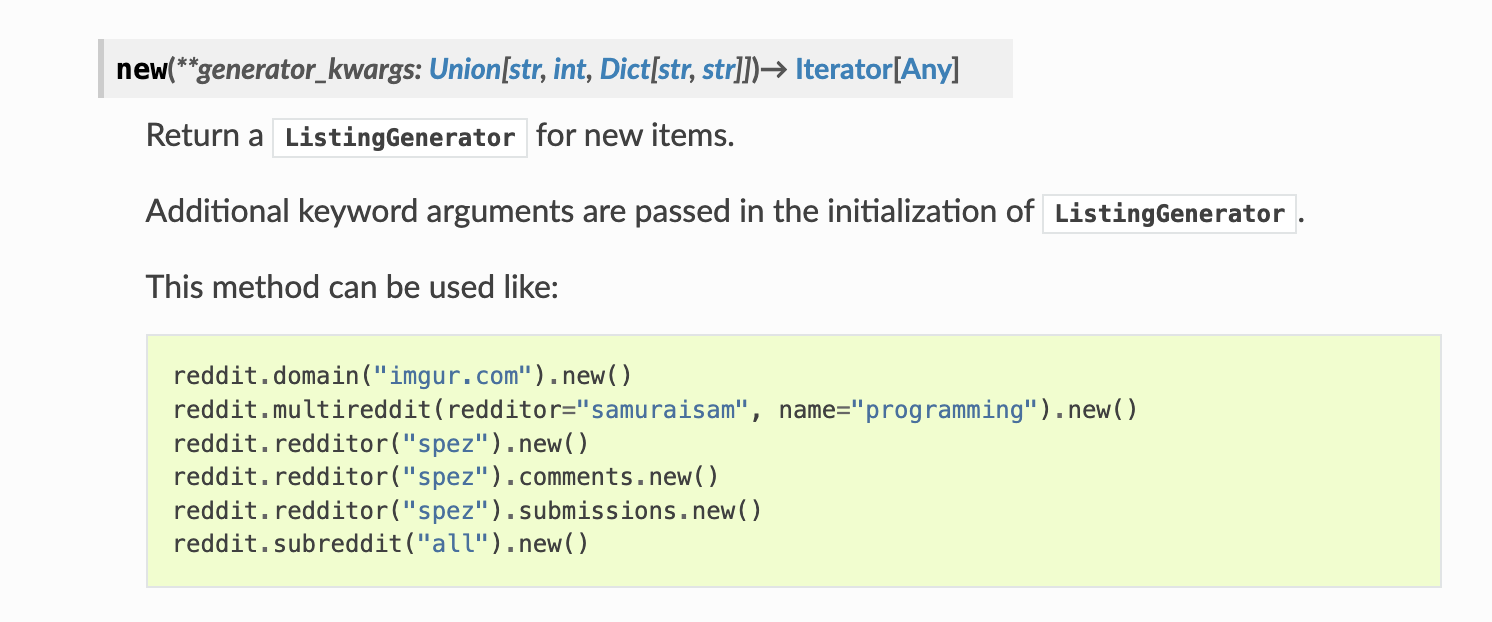

In [71]:
subreddit_tsla = reddit.subreddit("TSLA")

new_posts_tsla = []

for submission in subreddit_tsla.new():
    new_posts_tsla.append(submission)
        
print(len(new_posts_tsla))

100


> As you can see there are 100 new upcoming posts for the TSLA subreddit which is quite alot!

💽❓ Data Question:

6. Does there seem to be a large distribution of posters or a smaller concentration of posters who are very active? What kind of impact might this have on the data?

In [76]:
import pprint

counts = dict()

for post in new_posts_tsla:
    counts[post.author] = counts.get(post.author,0)+1
    
counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    
pprint.pprint(counts)

[(Redditor(name='wewewawa'), 28),
 (Redditor(name='LoganLee43'), 8),
 (Redditor(name='Ok_Nebula_7166'), 4),
 (Redditor(name='doodroller'), 3),
 (Redditor(name='droneauto'), 3),
 (Redditor(name='thewallstreetwitch'), 3),
 (Redditor(name='ju-ju2020'), 2),
 (Redditor(name='Gangpeh-'), 2),
 (Redditor(name='Islandsrq'), 2),
 (Redditor(name='trowawayfarawaytoday'), 2),
 (Redditor(name='Super_Stickman13'), 2),
 (Redditor(name='ferrymanding'), 2),
 (Redditor(name='AdmirableActuator'), 1),
 (Redditor(name='StocksWithCamden'), 1),
 (Redditor(name='Frequent_Ad_7439'), 1),
 (Redditor(name='PolarBearPolo'), 1),
 (Redditor(name='growamullet'), 1),
 (Redditor(name='eternalape9'), 1),
 (Redditor(name='Lost-Guarantee229'), 1),
 (Redditor(name='Severe_Entry_2176'), 1),
 (Redditor(name='Immediate-Assist-598'), 1),
 (Redditor(name='AwayAppointment5222'), 1),
 (Redditor(name='Bluecomet09'), 1),
 (Redditor(name='Heath1616'), 1),
 (Redditor(name='AgentBroccoli'), 1),
 (Redditor(name='Imqueenbitch'), 1),
 (Re

> As you can see the Redditor whose username is 'wewewawa' seems to be making majority of the new upcoming posts in the TSLA subreddit. This can impact the data that we are witnessing or trying to analyze because if this poster is overly negative or positive about his or her viewpoints on Tesla, it can greatly impact or inject bias into the sentiment analyses.